In [98]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [99]:
x_data = np.linspace(0.0,10.0,100000)

In [100]:
noise = np.random.randn(len(x_data))

In [101]:
x_data

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [102]:
y_true = (0.5 * x_data) + 5 + noise

In [103]:
y_true

array([ 6.23060812,  5.58585707,  5.78039355, ...,  8.93382373,
       10.43891134,  8.69167101])

In [104]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [105]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [106]:
my_data = pd.concat([x_df,y_df],axis=1)

In [107]:
my_data.head()

,X Data,Y
0,0.0000,6.230608
1,0.0001,5.585857
2,0.0002,5.780394
3,0.0003,4.823569
4,0.0004,4.918936


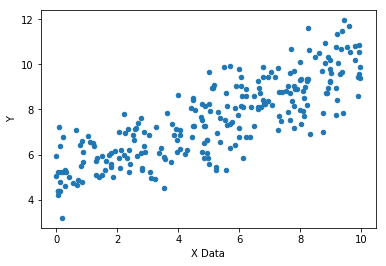

In [108]:
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y")

In [109]:
batch_size = 10

In [110]:
m = tf.Variable(0.11)
b = tf.Variable(0.2)

In [111]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [112]:
y_model = m * xph + b

In [113]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [114]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [115]:
init = tf.global_variables_initializer()

In [116]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches =1000
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_int],yph:y_true[rand_int]}
        
        sess.run(train,feed_dict=feed)
    
    final_slope, final_interceptor = sess.run([m,b])

In [117]:
final_slope

0.4764233

In [118]:
final_interceptor

4.953534

In [119]:
y_hat = final_slope*x_data + final_interceptor

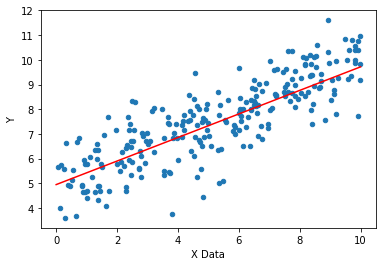

In [120]:
my_data.sample(250).plot(kind="scatter",x="X Data",y="Y")
plt.plot(x_data,y_hat,'r')

## Estimator in TF

In [121]:
feature_cols = [ tf.feature_column.numeric_column("x",shape=[1])]

In [122]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\kaushaab\\AppData\\Local\\Temp\\tmpf0xweqmd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000233C4C2A780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [125]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y=y_train,batch_size=8,num_epochs=None,shuffle=True)

In [126]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y=y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [127]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y=y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [128]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\kaushaab\AppData\Local\Temp\tmpf0xweqmd\model.ckpt.
INFO:tensorflow:loss = 606.2777, step = 1
INFO:tensorflow:global_step/sec: 618.932
INFO:tensorflow:loss = 25.541426, step = 101 (0.164 sec)
INFO:tensorflow:global_step/sec: 696.305
INFO:tensorflow:loss = 26.418446, step = 201 (0.145 sec)
INFO:tensorflow:global_step/sec: 721.35
INFO:tensorflow:loss = 10.827172, step = 301 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.539
INFO:tensorflow:loss = 14.455894, step = 401 (0.138 sec)
INFO:tensorflow:global_step/sec: 849.675
INFO:tensorflow:loss = 30.338146, step = 501 (0.117 sec)
INFO:tensorflow:global_step/sec: 903.409
INFO:tensorflow:loss = 8.628724, step = 601 (0.112 sec)
INFO:tensorflow:global_step/

In [129]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-06-08:11:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\kaushaab\AppData\Local\Temp\tmpf0xweqmd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-06-08:11:42
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0874003, global_step = 1000, label/mean = 7.489317, loss = 8.699203, prediction/mean = 7.343909
INFO:tensorflow:Saving 'checkpoint_pat

In [130]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-06-08:12:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\kaushaab\AppData\Local\Temp\tmpf0xweqmd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-06-08:12:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1179049, global_step = 1000, label/mean = 7.5189333, loss = 8.943239, prediction/mean = 7.3578806
INFO:tensorflow:Saving 'checkpoint_p

In [131]:
print("training metrics")
print(train_metrics)

training metrics
{'average_loss': 1.0874003, 'label/mean': 7.489317, 'loss': 8.699203, 'prediction/mean': 7.343909, 'global_step': 1000}


In [132]:
print("test metrics")
print(test_metrics)

test metrics
{'average_loss': 1.1179049, 'label/mean': 7.5189333, 'loss': 8.943239, 'prediction/mean': 7.3578806, 'global_step': 1000}


In [133]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [136]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\kaushaab\AppData\Local\Temp\tmpf0xweqmd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3667035], dtype=float32)},
 {'predictions': array([5.029663], dtype=float32)},
 {'predictions': array([5.6926227], dtype=float32)},
 {'predictions': array([6.355582], dtype=float32)},
 {'predictions': array([7.018542], dtype=float32)},
 {'predictions': array([7.6815014], dtype=float32)},
 {'predictions': array([8.3444605], dtype=float32)},
 {'predictions': array([9.00742], dtype=float32)},
 {'predictions': array([9.67038], dtype=float32)},
 {'predictions': array([10.33334], dtype=float32)}]

In [137]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\kaushaab\AppData\Local\Temp\tmpf0xweqmd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [138]:
predictions

[array([4.3667035], dtype=float32),
 array([5.029663], dtype=float32),
 array([5.6926227], dtype=float32),
 array([6.355582], dtype=float32),
 array([7.018542], dtype=float32),
 array([7.6815014], dtype=float32),
 array([8.3444605], dtype=float32),
 array([9.00742], dtype=float32),
 array([9.67038], dtype=float32),
 array([10.33334], dtype=float32)]

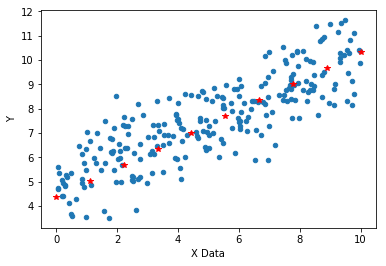

In [144]:
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y")
plt.plot(brand_new_data,predictions,"r*")